In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [17]:
df_DA_MAS = df[(df['job_country'] == 'Malaysia') & (df['job_title_short'] == 'Data Analyst')].copy()

In [22]:
df_DA_MAS['job_posted_month_no'] = df_DA_MAS['job_posted_date'].dt.month

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month_no
328,Data Analyst,Finance Data Analyst,"Sepang, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-07-14 13:11:55,True,False,Malaysia,None,NaN,NaN,AirAsia,"[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['...",7
1397,Data Analyst,Transfer Pricing Data Analyst,Malaysia,via BeBee Malaysia,Full-time,False,Malaysia,2023-08-18 13:29:59,False,False,Malaysia,None,NaN,NaN,KPMG PLT,"[sql, python, aws, gcp, azure, power bi, alter...","{'analyst_tools': ['power bi', 'alteryx', 'sap...",8
1510,Data Analyst,Data Test Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-05-06 14:15:47,True,False,Malaysia,None,NaN,NaN,Agensi Pekerjaan BTC Sdn Bhd,"[sql, aws, azure, selenium, linux]","{'cloud': ['aws', 'azure'], 'libraries': ['sel...",5
1568,Data Analyst,Metocean Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-07-10 13:10:20,False,False,Malaysia,None,NaN,NaN,Fugro,[python],{'programming': ['python']},7
1861,Data Analyst,Reference Data Analyst - Client Account Services,Malaysia,via Jooble,Full-time,False,Malaysia,2023-09-10 13:24:16,False,False,Malaysia,None,NaN,NaN,JP Morgan Chase & Co.,None,None,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784964,Data Analyst,Junior Data Analyst,"Petaling Jaya, Selangor, Malaysia",via BeBee Malaysia,Full-time,False,Malaysia,2023-11-16 06:22:31,False,False,Malaysia,None,NaN,NaN,Hexamatics Servvcom,None,None,11
785209,Data Analyst,Data Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time,False,Malaysia,2023-11-22 07:05:45,True,False,Malaysia,None,NaN,NaN,Quacquarelli Symonds,"[r, python, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr...",11
785218,Data Analyst,Data Administration Analyst,"Kuala Lumpur, Federal Territory of Kuala Lumpu...",via Trabajo.org,Full-time and Temp work,False,Malaysia,2023-11-17 06:20:50,False,False,Malaysia,None,NaN,NaN,PERSOLKELLY_RHQ,"[windows, flow]","{'os': ['windows'], 'other': ['flow']}",11
785341,Data Analyst,Data Analyst Clerk,"Petaling Jaya, Selangor, Malaysia",via Trabajo.org,Full-time,False,Malaysia,2023-11-23 06:24:44,False,False,Malaysia,None,NaN,NaN,Advanced Agriecological Research Sdn Bhd,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin...",11


In [23]:
df_DA_MAS_explode = df_DA_MAS.explode('job_skills')

In [42]:
df_DA_MAS_pivot = df_DA_MAS_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_MAS_pivot.loc['Total'] = df_DA_MAS_pivot.sum()

df_DA_MAS_pivot = df_DA_MAS_pivot[df_DA_MAS_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_MAS_pivot = df_DA_MAS_pivot.drop('Total')

In [46]:
DA_total = df_DA_MAS.groupby('job_posted_month_no').size()

In [83]:
df_DA_MAS_percentage = df_DA_MAS_pivot.div(DA_total/100, axis=0)

df_DA_MAS_percentage

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,mongo,powerbi,laravel,powershell,slack,ibm cloud,airtable,rshiny,rust,no-sql
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,36.554622,41.596639,21.008403,20.168067,19.327731,22.689076,9.243697,9.663866,8.403361,6.722689,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.420168,0.00000,0.000000,0.000000
2,36.871508,36.871508,25.139665,22.905028,20.670391,21.229050,14.525140,12.849162,11.731844,6.145251,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,50.000000,47.169811,28.301887,26.886792,23.584906,18.867925,14.150943,12.735849,9.905660,7.547170,...,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.000000,0.00000,0.000000,0.000000
4,40.101523,38.578680,24.873096,17.258883,21.827411,15.228426,16.243655,13.705584,5.583756,3.553299,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.507614,0.000000,0.00000,0.000000,0.000000
5,46.413502,41.772152,35.021097,20.675105,18.143460,16.877637,13.502110,9.282700,8.860759,9.704641,...,0.00000,0.00000,0.000000,0.421941,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
6,51.091703,43.231441,37.117904,22.707424,19.213974,11.353712,16.157205,11.353712,5.240175,4.803493,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.436681,0.436681
7,48.947368,34.736842,36.842105,18.421053,22.631579,11.578947,14.210526,10.000000,8.421053,6.315789,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,50.476190,46.666667,33.809524,29.523810,22.857143,14.285714,17.619048,10.952381,7.619048,8.095238,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
9,41.447368,35.526316,26.315789,28.289474,21.052632,10.526316,11.184211,7.236842,3.947368,3.947368,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [84]:
df_DA_MAS_percentage = df_DA_MAS_percentage.reset_index()
df_DA_MAS_percentage['job_posted_month'] = df_DA_MAS_percentage['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_MAS_percentage = df_DA_MAS_percentage.set_index('job_posted_month')
df_DA_MAS_percentage = df_DA_MAS_percentage.drop(columns='job_posted_month_no')

df_DA_MAS_percentage

job_skills,sql,excel,python,tableau,power bi,sas,r,sap,powerpoint,word,...,mongo,powerbi,laravel,powershell,slack,ibm cloud,airtable,rshiny,rust,no-sql
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,36.554622,41.596639,21.008403,20.168067,19.327731,22.689076,9.243697,9.663866,8.403361,6.722689,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.420168,0.00000,0.000000,0.000000
Feb,36.871508,36.871508,25.139665,22.905028,20.670391,21.229050,14.525140,12.849162,11.731844,6.145251,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Mar,50.000000,47.169811,28.301887,26.886792,23.584906,18.867925,14.150943,12.735849,9.905660,7.547170,...,0.00000,0.00000,0.000000,0.000000,0.471698,0.000000,0.000000,0.00000,0.000000,0.000000
Apr,40.101523,38.578680,24.873096,17.258883,21.827411,15.228426,16.243655,13.705584,5.583756,3.553299,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.507614,0.000000,0.00000,0.000000,0.000000
May,46.413502,41.772152,35.021097,20.675105,18.143460,16.877637,13.502110,9.282700,8.860759,9.704641,...,0.00000,0.00000,0.000000,0.421941,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Jun,51.091703,43.231441,37.117904,22.707424,19.213974,11.353712,16.157205,11.353712,5.240175,4.803493,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.436681,0.436681
Jul,48.947368,34.736842,36.842105,18.421053,22.631579,11.578947,14.210526,10.000000,8.421053,6.315789,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Aug,50.476190,46.666667,33.809524,29.523810,22.857143,14.285714,17.619048,10.952381,7.619048,8.095238,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Sep,41.447368,35.526316,26.315789,28.289474,21.052632,10.526316,11.184211,7.236842,3.947368,3.947368,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


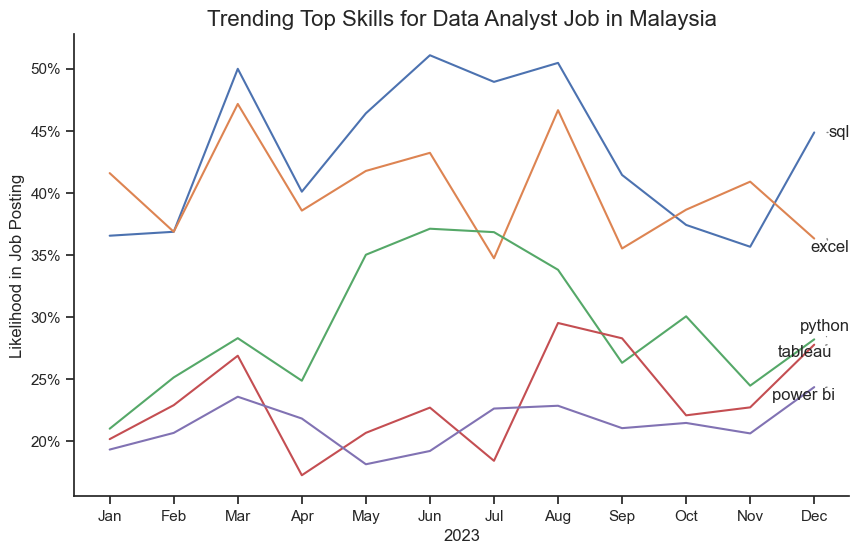

In [139]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_plot = df_DA_MAS_percentage.iloc[:, :5]

plt.figure(figsize=(10,6))
sns.lineplot(data=df_plot, dashes=False, legend=False)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analyst Job in Malaysia', fontsize=16)
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')

ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

texts = []
for i, col in enumerate(df_plot.columns):
    y = df_plot.iloc[-1, i]
    texts.append(plt.text(11.2, y, col, va='center'))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.show()